# 고객 대출등급 예측 모델

## 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

In [2]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [17]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
test.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [18]:
# 결측치 확인
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [94]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [19]:
# 중복 확인
train.duplicated().sum()

0

In [92]:
categorical = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in categorical:
    print(f'{col} : ')
    print(train[col].unique())

대출기간 : 
[' 36 months' ' 60 months']
근로기간 : 
['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 : 
['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적 : 
['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']


## EDA

In [20]:
# 근로기간 데이터 정리
train['근로기간'] = train['근로기간'].replace('1 years', '1 year')
train['근로기간'] = train['근로기간'].replace('<1 year', '< 1 year')
train['근로기간'] = train['근로기간'].replace('3', '3 years')
train['근로기간'] = train['근로기간'].replace('10+years', '10+ years')
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year'],
      dtype=object)

In [3]:
# ID 컬럼 삭제
train.drop('ID', axis=1, inplace=True)
# test.drop('ID', axis=1, inplace=True)

In [23]:
# 대출기간 타입변환 object -> int
# 단위 개월 -> 년
train['대출기간'].replace({' 36 months' : '3', ' 60 months' : '5'}, inplace=True)
train['대출기간'] = train['대출기간'].astype('int64')

In [24]:
train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,3,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,5,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,3,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,3,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,5,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [5]:
# test 데이터 전처리
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          64197 non-null  int64  
 1   대출기간          64197 non-null  object 
 2   근로기간          64197 non-null  object 
 3   주택소유상태        64197 non-null  object 
 4   연간소득          64197 non-null  int64  
 5   부채_대비_소득_비율   64197 non-null  float64
 6   총계좌수          64197 non-null  int64  
 7   대출목적          64197 non-null  object 
 8   최근_2년간_연체_횟수  64197 non-null  int64  
 9   총상환원금         64197 non-null  int64  
 10  총상환이자         64197 non-null  float64
 11  총연체금액         64197 non-null  float64
 12  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.4+ MB


In [6]:
# 결측치 확인
test.isnull().sum()

대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [7]:
# 중복 확인
test.duplicated().sum()

0

In [8]:
# 근로기간 중복 값 정리
test['근로기간'].replace({'1 years' : '1 year', '<1 year' : '< 1 year', '3' : '3 years', '10+years' : '10+ years'}, inplace=True)
test['근로기간'].unique()

array(['8 years', '5 years', '6 years', 'Unknown', '10+ years', '3 years',
       '< 1 year', '1 year', '7 years', '4 years', '2 years', '9 years'],
      dtype=object)

In [9]:
# 대출기간 타입변환 object -> int
# 단위 개월 -> 년
test['대출기간'].replace({' 36 months' : '3', ' 60 months' : '5'}, inplace=True)
test['대출기간'] = test['대출기간'].astype('int64')

### 시각화

- 대출금액, 연간소득, 총상환원금, 총상환이자의 단위가 커서 로그변환이 필요해보임

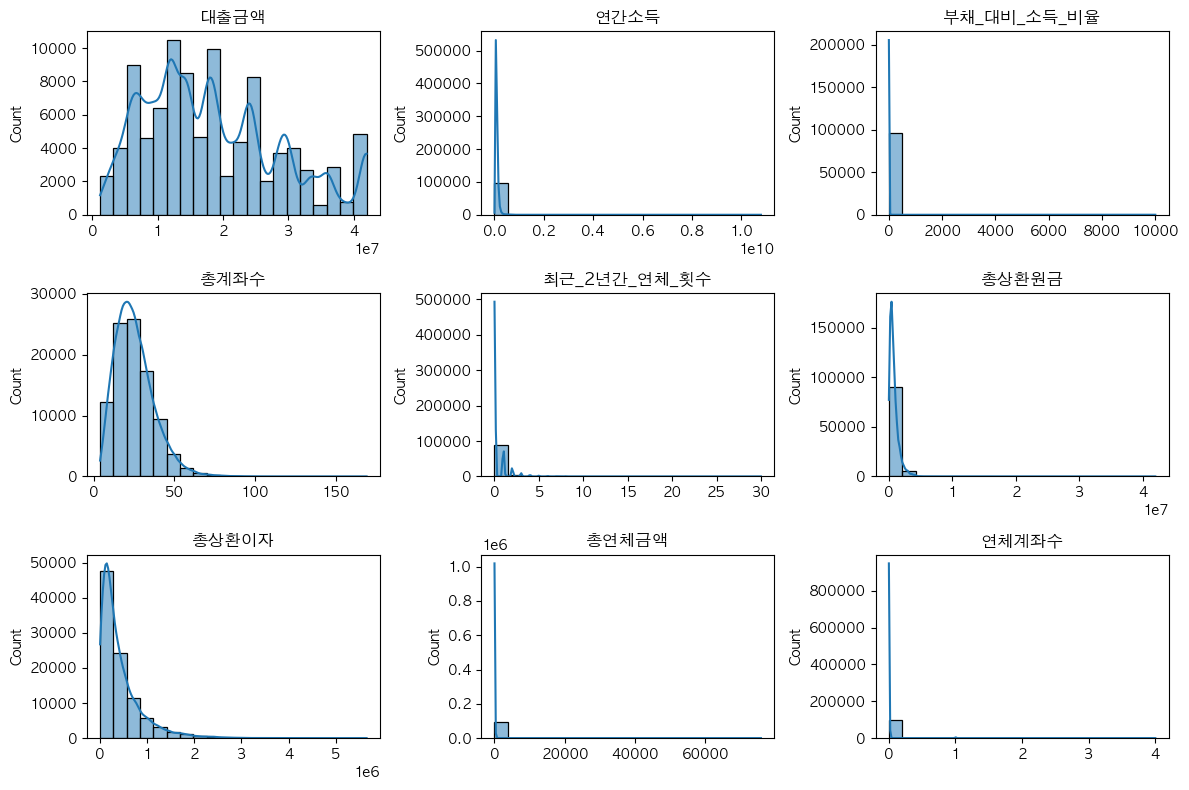

In [99]:
# 수치형 컬럼 시각화
from matplotlib import rc
rc('font', family='AppleGothic')

numerical_cols = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=train[col], bins=20, kde=True, edgecolor='black')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

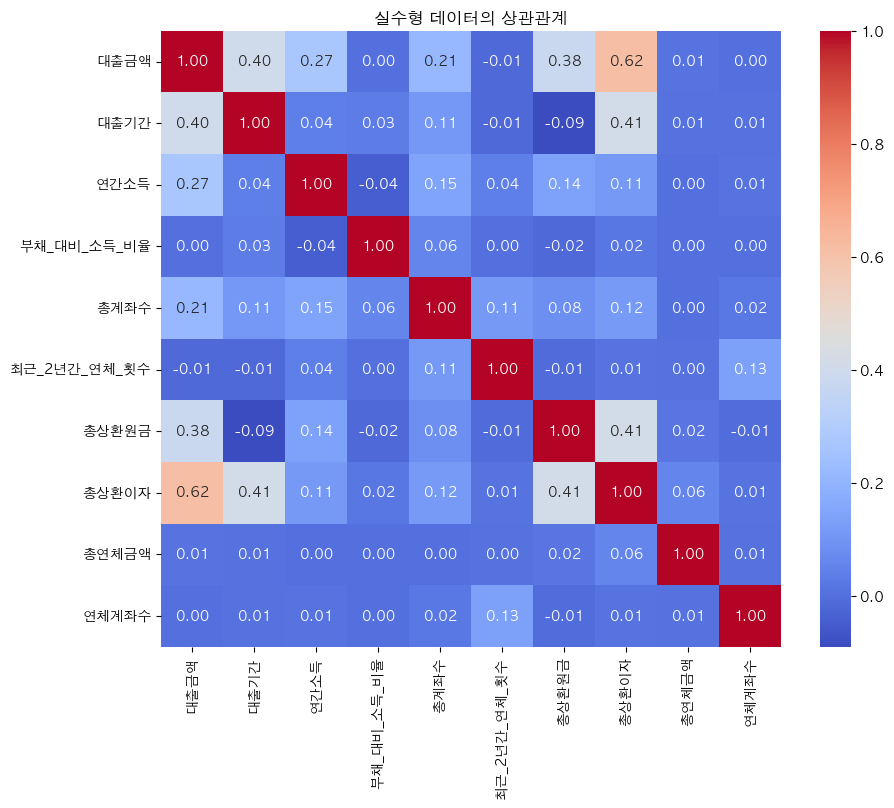

In [17]:
# 수치형 컬럼 상관관계 히트맵
# 대출금액과 총상환이자의 상관계수가 0.62로 꽤 높음 -> 다중공산성 주의 필요
numerical_columns = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
                     '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

corr_matrix = train[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('실수형 데이터의 상관관계')
plt.show()

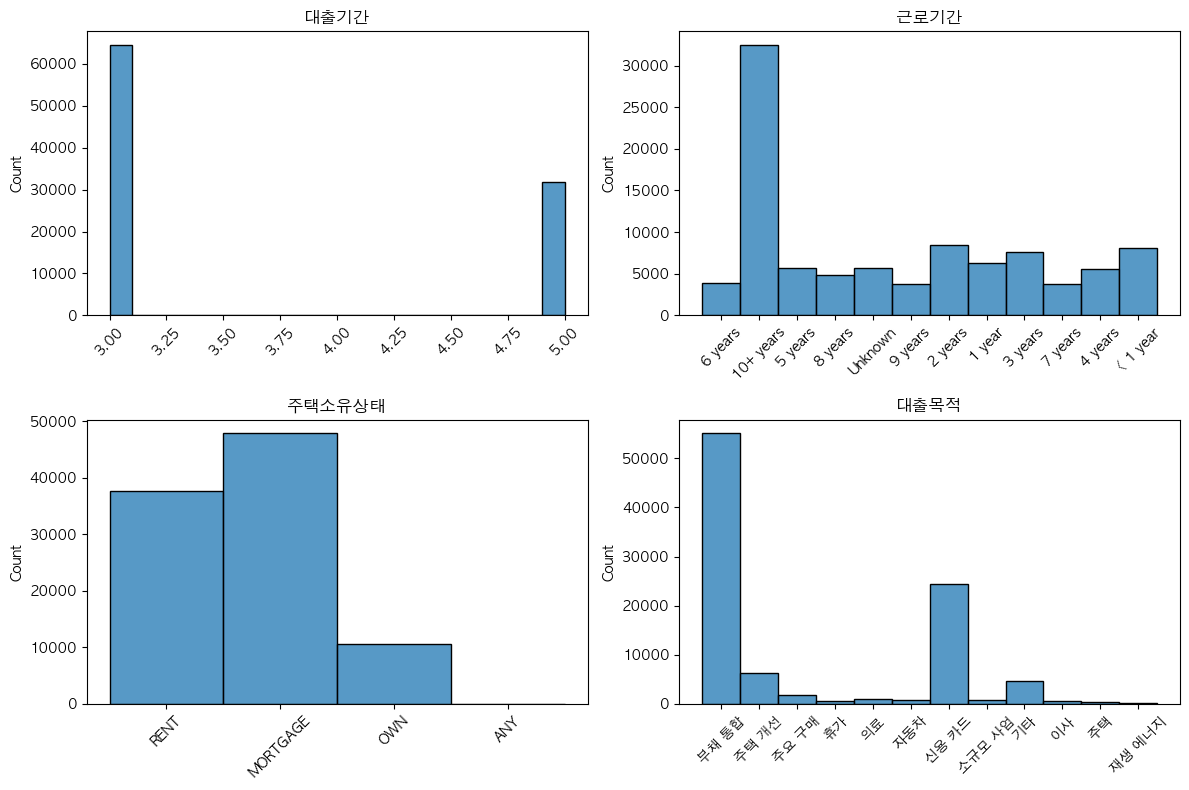

In [18]:
# 범주형 컬럼 시각화
categorical_cols = ['대출기간', '근로기간', '주택소유상태', '대출목적']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=train[col], bins=20)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

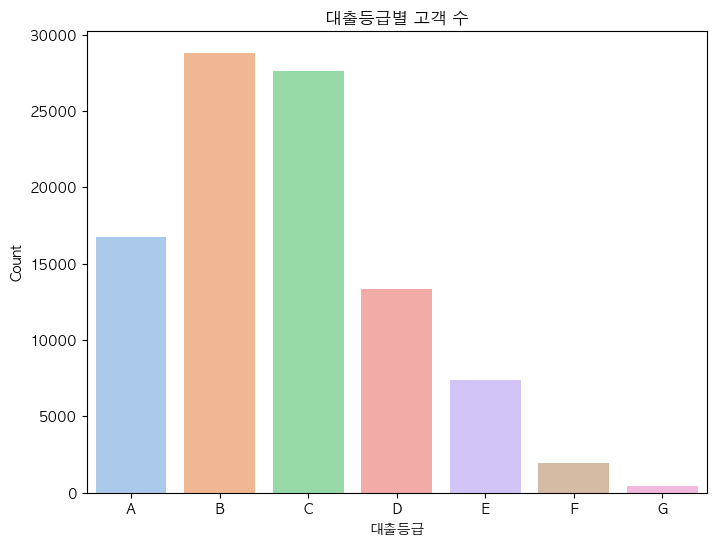

In [19]:
# 대출 등급별 고객 수 확인
plt.figure(figsize=(8,6))
sns.countplot(x=train['대출등급'].sort_values(), palette='pastel')
plt.title('대출등급별 고객 수')
plt.xlabel('대출등급')
plt.ylabel('Count')

plt.show()

/Users/jyunghyechoi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


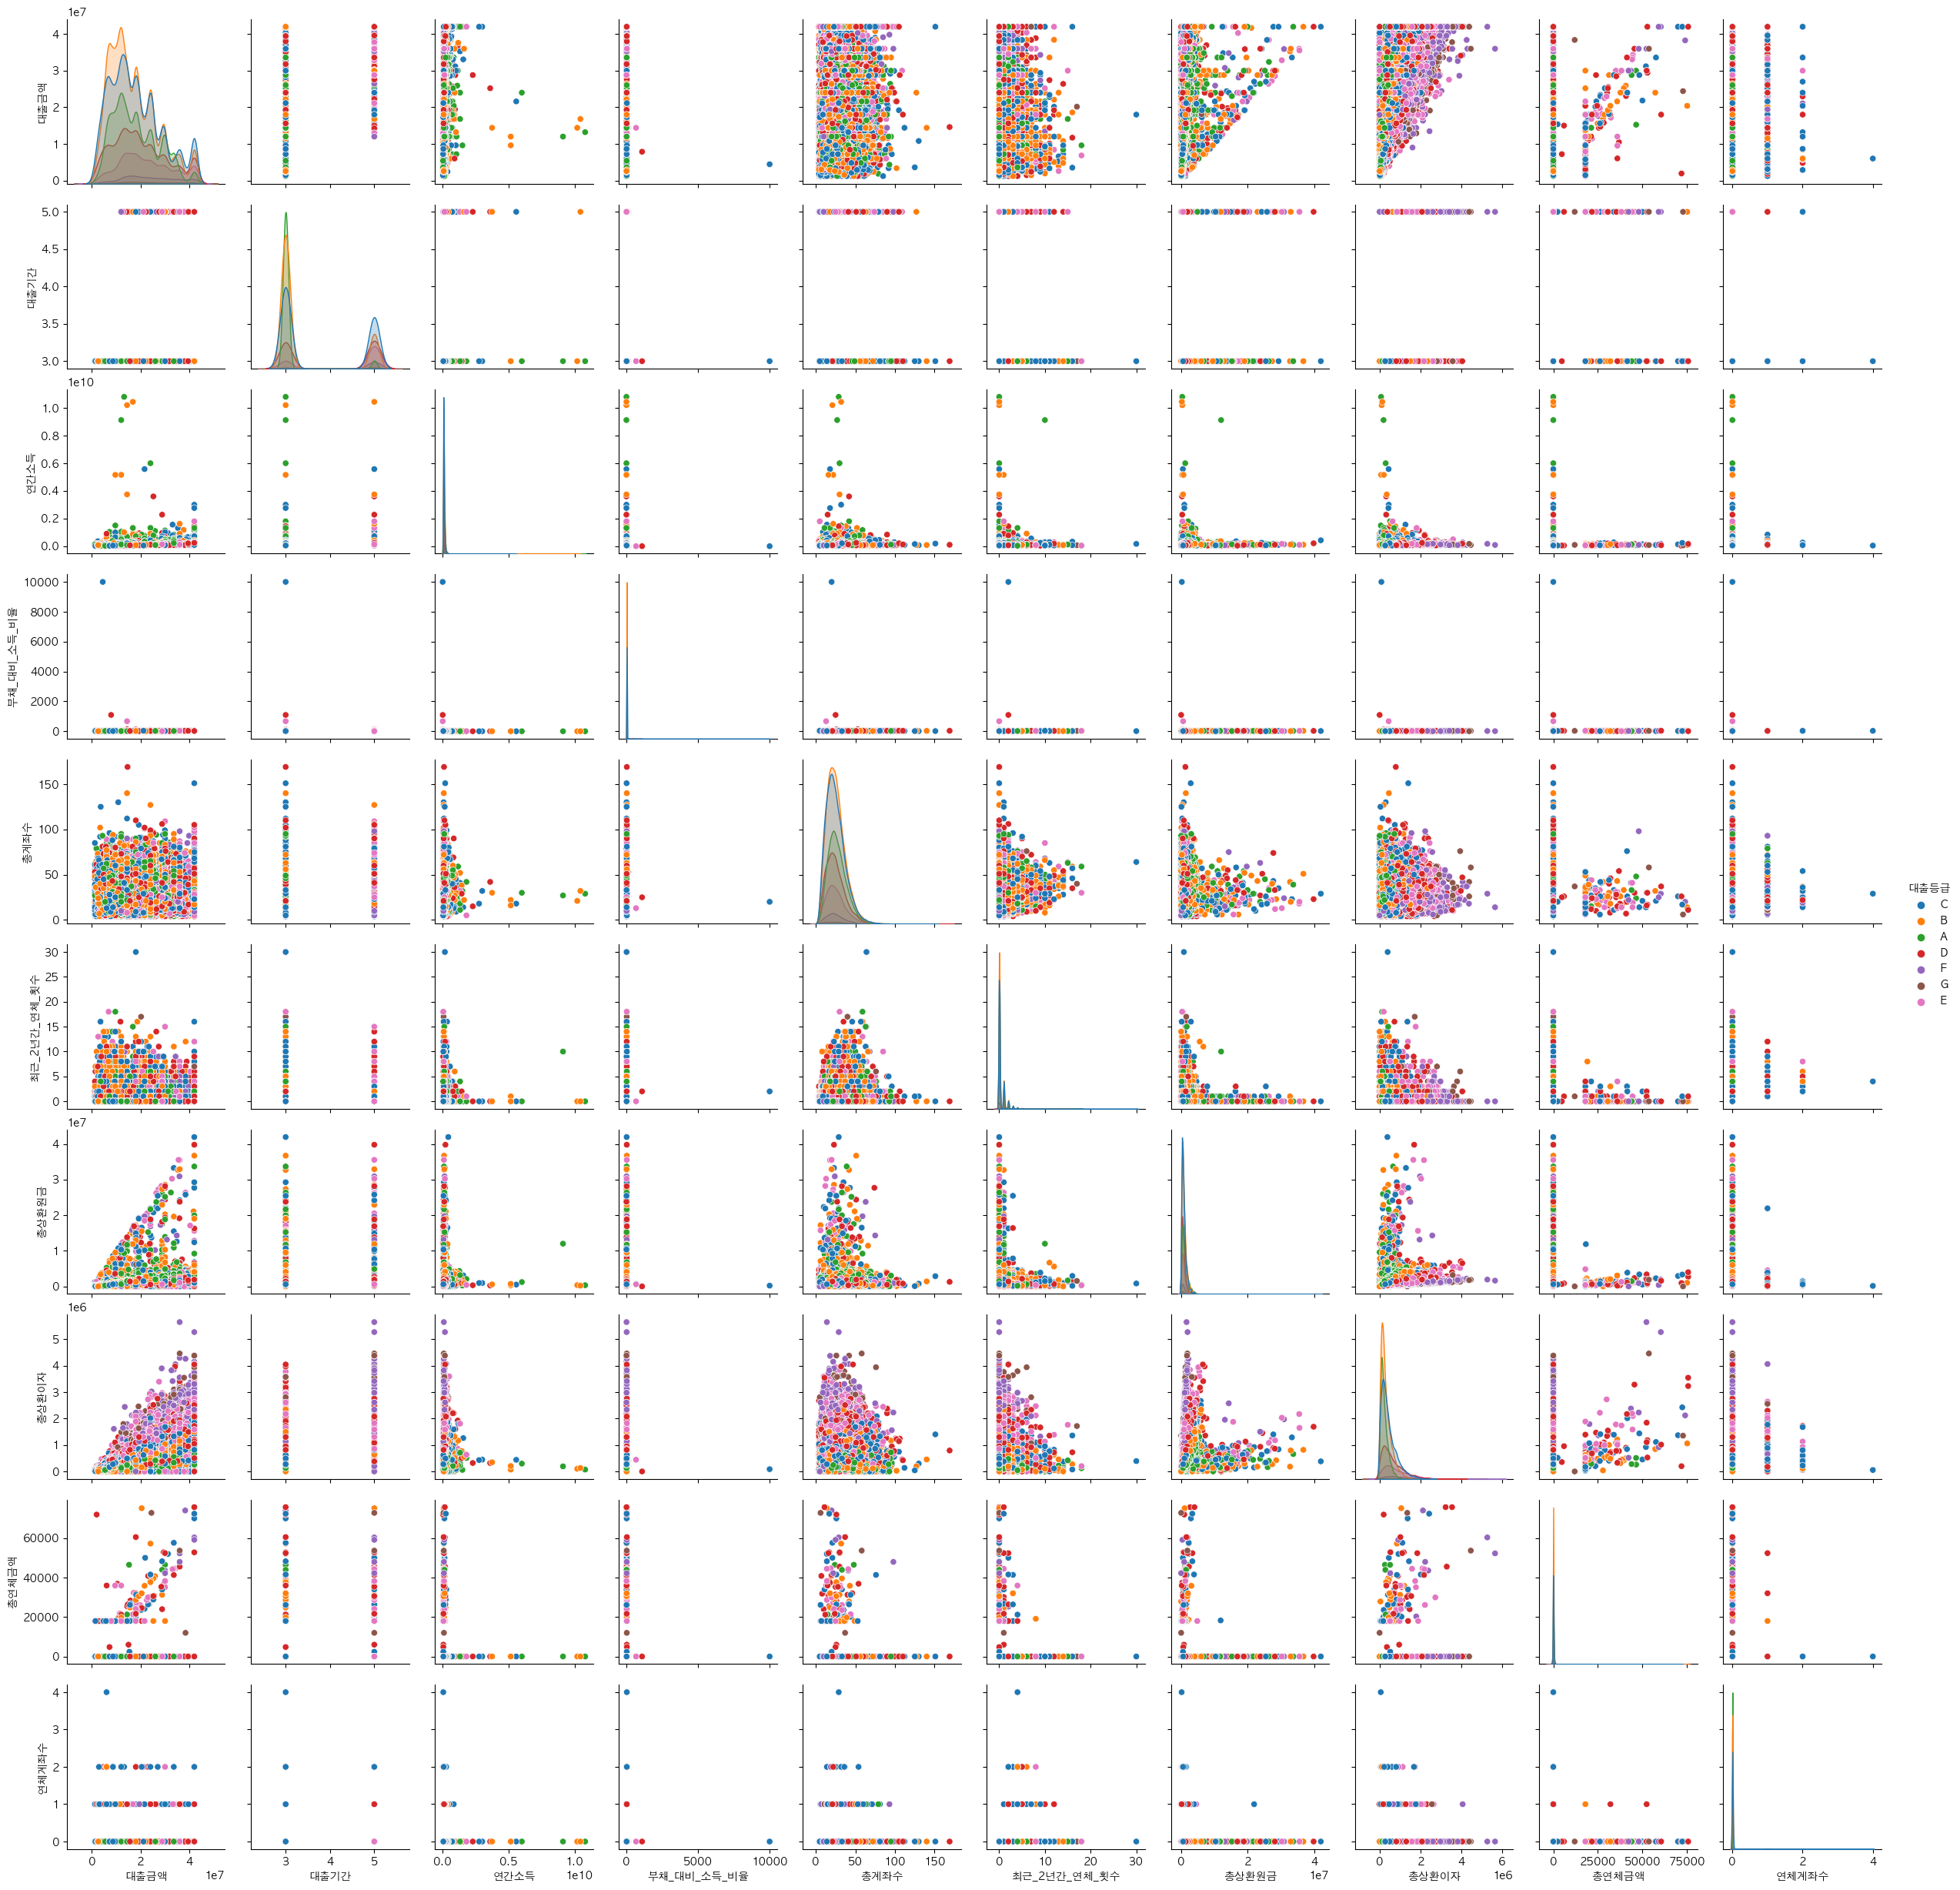

In [32]:
grade = '대출등급'
sns.pairplot(train, hue=grade)
plt.show()

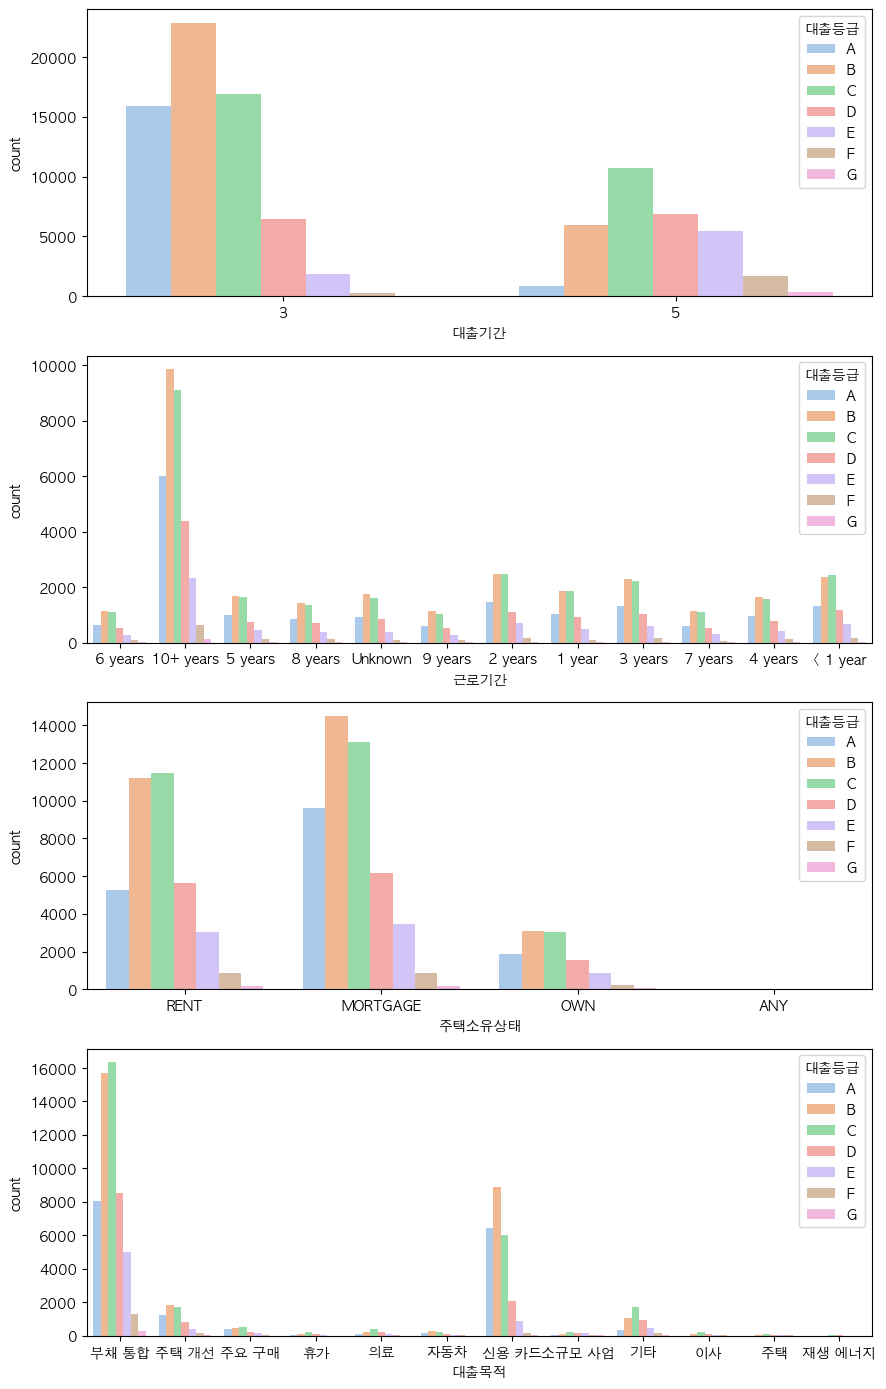

In [62]:
# 범주형 데이터의 등급별 분포
num_rows = len(categorical_cols)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

fig, axes = plt.subplots(num_rows, 1, figsize=(9, 14))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, hue='대출등급', hue_order=grade_order, palette='pastel', ax=axes[i])

plt.tight_layout()
plt.show()

### 주택소유상태가 ANY인 데이터 처리
    - 해당되는 데이터는 1개
    - 삭제해도 크게 영향을 줄 것 같지 않은 크기지만 최빈값인 MORTGAGE로 채우기로 결정

In [70]:
# 주택소유상태가 ANY인 데이터 확인 -> 1개만 존재(결측치일까?)
train[train['주택소유상태'] == 'ANY'].value_counts().sum()

1

In [100]:
# 확인 결과 : 총상환원금과 총상환이자가 모두 0인 데이터였음
train[train['주택소유상태'] == 'ANY']

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,41160000,3,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [72]:
# 주택소유상태의 최빈값 확인
train.describe(include='all')

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,loan_grade
count,9.629400e+04,96294.000000,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294,96294
unique,NaN,NaN,12,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7,7
top,NaN,NaN,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B,B
freq,NaN,NaN,32481,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817,28817
mean,1.830400e+07,3.660789,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN,NaN
std,1.032908e+07,0.940715,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN,NaN
min,1.200000e+06,3.000000,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN
25%,1.020000e+07,3.000000,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN,NaN
50%,1.680000e+07,3.000000,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN,NaN
75%,2.400000e+07,5.000000,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN,NaN


In [25]:
# 1개밖에 없으니 최빈값(MORTGAGE)으로 채우기로 결정
train.loc[train['주택소유상태'] == 'ANY', '주택소유상태'] = 'MORTGAGE'
train[train['주택소유상태'] == 'ANY'].value_counts().sum()

0

In [10]:
test.loc[test['주택소유상태'] == 'ANY', '주택소유상태'] = 'MORTGAGE'
test[test['주택소유상태'] == 'ANY'].value_counts().sum()

0

### 근로기간이 Unknown인 데이터 처리

In [102]:
# 데이터 개수 확인 -> 5671개
train[train['근로기간'] == 'Unknown'].value_counts().sum()

5671

In [26]:
# unknown은 0으로 처리
train['근로기간'] = train['근로기간'].replace('Unknown', '0')

In [27]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', '0', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year'],
      dtype=object)

In [11]:
test['근로기간'] = test['근로기간'].replace('Unknown', '0')

### 총상환원금과 총상환이자가 0인 데이터 확인

In [105]:
# 두 특성 모두 0인 데이터
both_zero = train[(train['총상환원금'] == 0) & (train['총상환이자'] == 0)]
principal_zero = train[(train['총상환원금'] == 0) & (train['총상환이자'] != 0)]
interest_zero = train[(train['총상환원금'] != 0) & (train['총상환이자'] == 0)]
print('모두 0인 데이터 : ' , both_zero.shape)
print('총상환원금만 0인 데이터 : ' , principal_zero.shape)
print('총상환이자만 0인 데이터 : ' , interest_zero.shape)

모두 0인 데이터 :  (5407, 14)
총상환원금만 0인 데이터 :  (5, 14)
총상환이자만 0인 데이터 :  (37, 14)


In [106]:
# 모두 0인 데이터의 비율 -> 전체의 5.6%
zero_ratio = (both_zero.shape[0] / train.shape[0])
print('모두 0인 데이터의 비율', zero_ratio)

모두 0인 데이터의 비율 0.056150954368911876


In [107]:
# 모두 0인 데이터와 0이 아닌 데이터의 비교
both_zero.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,3,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
19,15900000,3,0,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
36,7800000,3,10+ years,MORTGAGE,86400000,23.10,20,기타,0,0,0.0,0.0,0.0,B
61,2400000,3,7 years,MORTGAGE,120000000,20.86,32,기타,0,0,0.0,0.0,0.0,B
90,12000000,5,9 years,RENT,78000000,19.87,19,부채 통합,0,0,0.0,0.0,0.0,E


In [110]:
interest_zero.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
1031,28800000,3,< 1 year,RENT,144000000,8.09,46,부채 통합,3,307308,0.0,0.0,0.0,A
1717,4800000,3,8 years,MORTGAGE,72000000,24.12,23,주택 개선,0,155724,0.0,0.0,0.0,B
2916,1680000,3,10+ years,RENT,139200000,23.81,36,주택 개선,0,720000,0.0,0.0,0.0,B
3482,36000000,5,3 years,RENT,123600000,7.96,33,부채 통합,0,10824,0.0,0.0,0.0,D
6255,12000000,3,< 1 year,RENT,48000000,4.98,10,신용 카드,0,2400000,0.0,0.0,0.0,A


In [109]:
principal_zero.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
22388,16800000,3,1 year,MORTGAGE,81600000,36.83,42,신용 카드,0,0,38904.0,27900.0,0.0,B
62119,24420000,5,10+ years,RENT,60000000,15.36,6,기타,0,0,1354656.0,72864.0,0.0,G
87055,12000000,3,10+ years,MORTGAGE,126000000,21.76,38,부채 통합,0,0,114552.0,0.0,0.0,B
88120,14400000,5,5 years,RENT,90000000,15.11,10,부채 통합,0,0,91848.0,18000.0,0.0,C
90818,30000000,5,10+ years,MORTGAGE,93600000,16.48,22,부채 통합,0,0,519408.0,42276.0,0.0,F


In [120]:
# 둘 다 0인 데이터 분리하여 저장 (미래를 위햐여)
both_zero.to_csv('both_zero.csv', index=False)

### 총상환원금과 총상환이자가 모두 0인 고객의 등급별 비율이 0이 아닌 고객들의 등급별 비율과 크게 다르지 않다.
    - 이건 다른 데이터는 정상적으로 기입이 되어 있지만 해당 두개 특성이 결측치인 것일수도 있다
    - 해당 데이터를 각 특성의 평균값으로 대체해보는 것도 좋은 방법이라고 생각됨
    - 아니면 평균으로 대체한 데이터와 아예 삭제한 데이터를 모드 훈련해보고 성능 차이를 보는 것도 좋은 방법
    - 일단 유지를 결정

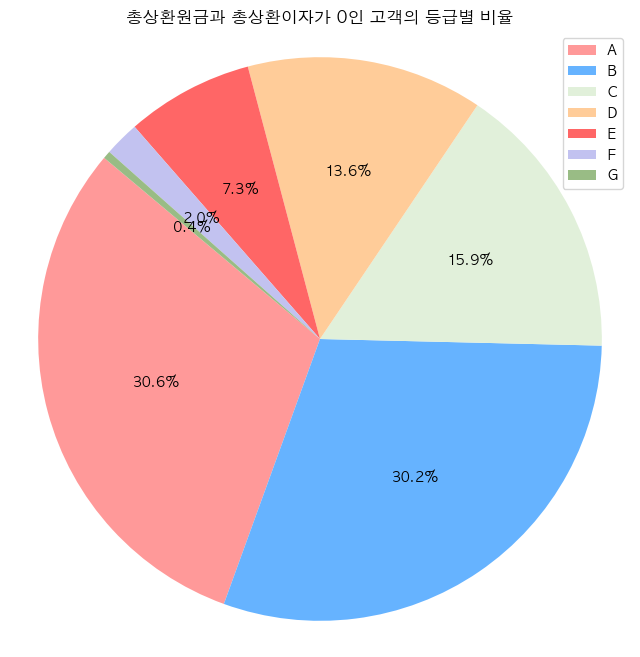

In [162]:
loan_grade_counts = both_zero['대출등급'].value_counts()
colors = ['#ff9999', '#66b3ff', '#E1F0DA', '#ffcc99', '#ff6666', '#c2c2f0', '#99BC85']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_grade_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('총상환원금과 총상환이자가 0인 고객의 등급별 비율')
plt.axis('equal')
plt.legend(loan_grade_counts.index.sort_values())
plt.show()

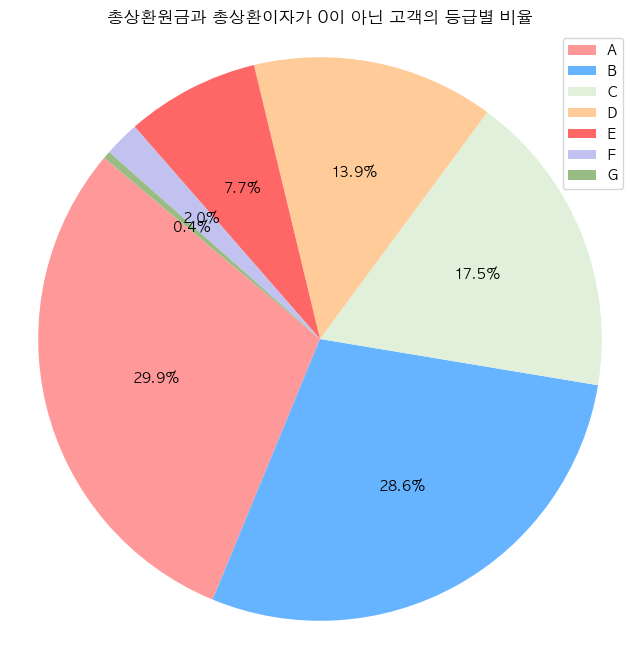

In [163]:
# 0이 아닌 고객의 등급별 비율
loan_grade_counts = train_pre['대출등급'].value_counts()
colors = ['#ff9999', '#66b3ff', '#E1F0DA', '#ffcc99', '#ff6666', '#c2c2f0', '#99BC85']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_grade_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('총상환원금과 총상환이자가 0이 아닌 고객의 등급별 비율')
plt.axis('equal')
plt.legend(loan_grade_counts.index.sort_values())
plt.show()

In [28]:
# 현재까지 전처리된 데이터 저장
train_data = train.to_csv('train_data.csv', index=False)

In [12]:
# test 데이터 저장
test_pre = test.to_csv('test_pre.csv', index=False)

In [121]:
# 둘 다 0이 아닌 데이터를 제외한 데이터 저장
train_pre = train[(train['총상환원금'] != 0) | (train['총상환이자'] != 0)]
train_pre.to_csv('train_pre.csv', index=False)

In [122]:
train_pre.shape

(90887, 14)

### 이상치 확인
    - 수치형 데이터를 박스플롯으로 시각화하여 이상치 확인
    - 추후에 중요도가 높은 특성 혹은 상관관계가 높은 변수에 대해서만 이상치 제거 예정

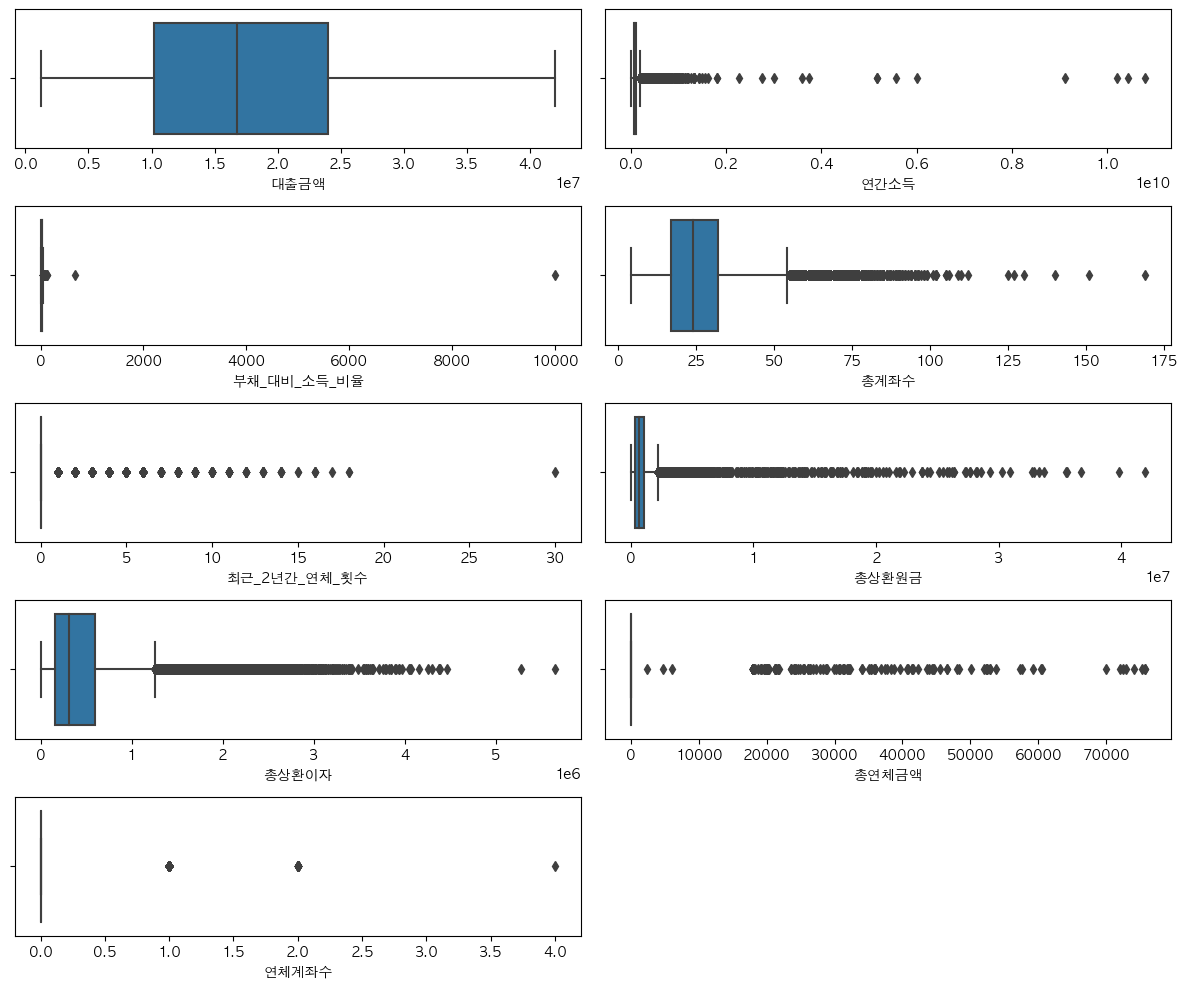

In [125]:
# 이상치 탐지를 위한 시각화

num_rows = (len(numerical_cols) + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train_pre[col], ax=axes[i])

if len(numerical_cols) % 2 != 0:
    fig.delaxes(axes[len(numerical_cols)])

plt.tight_layout()
plt.show()

## 피쳐 엔지니어링
    - 파생 변수 생성, 추가
    - 스케일링 진행

## 스케일링
    - 로그 변환
    - 스케일러 선택

In [121]:
train = pd.read_csv('train_data.csv')
# test = pd.read_csv('test_pre.csv')

In [123]:
# 총상환원금비율과 총상환이자비율 추가
train['총상환원금비율'] = train['총상환원금'] / train['대출금액']
train['총상환이자비율'] = train['총상환이자'] / train['대출금액']

In [124]:
train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율
0,12480000,3,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000
1,14400000,5,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.025943,0.016254
2,12000000,3,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.077387,0.012662
3,14400000,3,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.022627,0.010632
4,18000000,5,0,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.012697,0.008275


In [125]:
# 로그 변환 (왜도가 있는 연간소득, 총상환원금, 총상환이자에 대한 처리)
train['연간소득_log'] = np.log1p(train['연간소득'])
train['총상환원금_log'] = np.log1p(train['총상환원금'])
train['총상환이자_log'] = np.log1p(train['총상환이자'])

# test['연간소득_log'] = np.log1p(test['연간소득'])
# test['총상환원금_log'] = np.log1p(test['총상환원금'])
# test['총상환이자_log'] = np.log1p(test['총상환이자'])

In [126]:
train = train.drop(['연간소득', '총상환이자', '총상환원금'], axis=1)
# test = test.drop(['연간소득', '총상환이자', '총상환원금'], axis=1)

In [128]:
# 여기까지의 데이터 저장
train.to_csv('train_log_feature.csv', index=False)

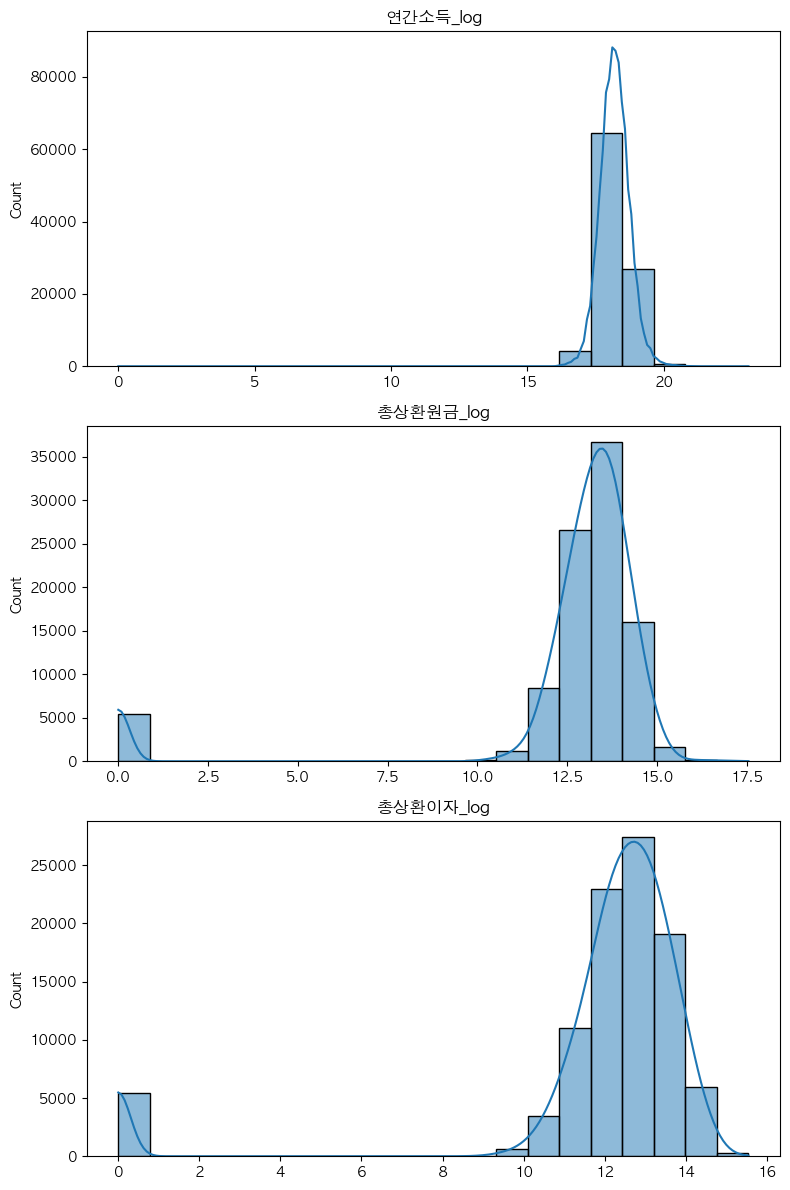

In [36]:
# 시각화하여 확인
# 처음보다는 나아진 모습, 이제 분포를 어느정도 확인 가능
from matplotlib import rc
rc('font', family='AppleGothic')

log_cols = ['연간소득_log', '총상환원금_log', '총상환이자_log']

plt.figure(figsize=(8, 12))
for i, col in enumerate(log_cols, 1):
    plt.subplot(3, 1, i)
    sns.histplot(data=train[col], bins=20, kde=True, edgecolor='black')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

In [110]:
numeric_cols = ['대출금액', '대출기간', '연간소득_log', '부채_대비_소득_비율', 
                '총계좌수', '최근_2년간_연체_횟수', '총상환원금_log', '총상환이자_log',
               '총연체금액', '연체계좌수', '총상환원금비율', '총상환이자비율']

In [111]:
# 스케일링
# 이상치가 많고 정규분포를 따르는 특성이 없기 때문에 RobustScaler 선택
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
# test[numeric_cols] = scaler.transform(test_pre[numeric_cols])

In [71]:
# 테스트 세트에 훈련 세트에는 존재하지 않는 '결혼'이라는 값이 존재
test[test['대출목적'] == '결혼']

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,연간소득_log,총상환원금_log,총상환이자_log
34486,-0.782609,0.0,2,0,-0.080683,0.6,결혼,0.0,0.0,0.0,-1.054394,0.125511,0.061116


In [72]:
# '결혼' -> '기타'로 변환 후 진행
test['대출목적'].replace({'결혼':'기타'}, inplace=True)

In [113]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

object = train.select_dtypes(include = 'object').columns
le = LabelEncoder()
for i in object:
    if i != '대출등급':
        train[i] = le.fit_transform(train[i])
#         test[i] = le.transform(test[i])

In [77]:
# 불필요한 특성 제거
train_first = train.drop(['대출목적'], axis=1)

In [79]:
# 데이터 분리
X = train_first.drop('대출등급', axis=1)
y = train_first['대출등급']

## 모델 훈련
    - RandomForestClassifier 사용
    - hyperparameter tuning 시도

In [87]:
# 기본 모델 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_validate(rf, X, y, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8216919206804224


In [89]:
rf.fit(X, y)

[0.10197182 0.02961133 0.0440657  0.01454974 0.08655336 0.06638358
 0.01426538 0.00056009 0.00087089 0.07857268 0.2843164  0.27827903]


In [96]:
# 특성 중요도 확인
for feat, importance in zip(X.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

대출금액 : 0.10197182130483305
대출기간 : 0.02961132541454979
근로기간 : 0.04406570372431512
주택소유상태 : 0.01454974424217432
부채_대비_소득_비율 : 0.08655335738306183
총계좌수 : 0.06638358336139343
최근_2년간_연체_횟수 : 0.01426538074150509
총연체금액 : 0.0005600883164978006
연체계좌수 : 0.0008708870623585934
연간소득_log : 0.07857268052194927
총상환원금_log : 0.2843164006042023
총상환이자_log : 0.2782790273231594


### 중요도가 낮은 특성 제거
- 총연체금액, 연체계좌수, 주택소유상태, 최근_2년간_연체_횟수 제거
- 중요도가 가장 높은 건 대출금액 - 부채_대비_소득_비율 - 연간소득_log 순

In [136]:
X.head()

,대출금액,대출기간,근로기간,부채_대비_소득_비율,총계좌수,대출목적,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,0.0,7,0.012413,-0.600000,1,-0.946399,-0.967514,-0.119095,-10.790385,-8.705597
1,-0.173913,1.0,2,0.278510,-0.200000,10,-0.384226,-0.160701,0.769179,-0.381266,-0.141258
2,-0.347826,0.0,6,-0.786656,-0.666667,1,0.730573,-0.339006,0.308944,0.357474,-0.440557
3,-0.173913,0.0,9,-0.283165,-0.600000,1,-0.456080,-0.439745,0.782767,-0.492208,-0.435271
4,0.086957,1.0,0,0.515904,-0.333333,8,-0.671262,-0.556748,-0.124560,-0.779916,-0.454315


In [135]:
# 중요도가 낮은 피쳐 제거, 새로운 피쳐 추가 후 다시 시도
from sklearn.metrics import make_scorer, f1_score, accuracy_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score_macro': make_scorer(f1_score, average='macro')
}

scores = cross_validate(rf, X, y, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.947867994069678


In [139]:
# 정확도와 F1 점수 확인
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)

accuracy_scores = scores['test_accuracy']
f1_scores = scores['test_f1_score_macro']

print("Accuracy Scores:", accuracy_scores)
print("F1 Scores:", f1_scores)

avg_accuracy_score = np.mean(accuracy_scores)
avg_f1_score = np.mean(f1_scores)

print("Average Accuracy Score:", avg_accuracy_score)
print("Average F1 Score:", avg_f1_score)

Accuracy Scores: [0.94662236 0.94843969 0.94797238 0.94781661 0.94848894]
F1 Scores: [0.92624223 0.9315358  0.92753269 0.93000989 0.92669263]
Average Accuracy Score: 0.947867994069678
Average F1 Score: 0.9284026451394528


In [140]:
# 특성 중요도 확인
rf.fit(X, y)
for feat, importance in zip(X.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

대출금액 : 0.03865992062383318
대출기간 : 0.02666897312788766
근로기간 : 0.011128574642651252
부채_대비_소득_비율 : 0.02349304515293803
총계좌수 : 0.01774652905779242
대출목적 : 0.007565250423586511
총상환원금비율 : 0.4534228433891419
총상환이자비율 : 0.24959562028606444
연간소득_log : 0.023489524151993634
총상환원금_log : 0.07947776099648002
총상환이자_log : 0.06875195814763084


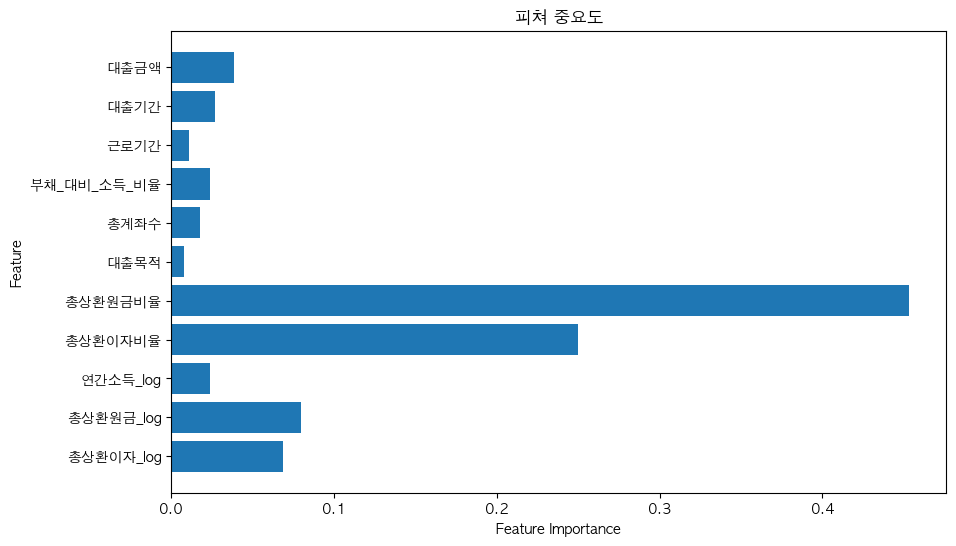

In [152]:
# 새로운 변수의 중요도가 매우 높음을 확인
# 추가적으로 대출목적, 근로기간 같은 중요도가 낮은 피쳐를 삭제하고 시도해볼 수 있음
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('피쳐 중요도')
plt.gca().invert_yaxis()
plt.show()